In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
df.describe(include = 'O')

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13319,13304,7818,13320
unique,4,81,1305,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,540,5199,80,843


In [8]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [9]:
for column in df.columns:
    print(df[column].value_counts())
    print('*'*20)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
********************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
17-Jan               1
14-Jul               1
14-Nov               1
16-Nov               1
15-Dec               1
Name: availability, Length: 81, dtype: int64
********************
Whitefield              540
Sarjapur  Road          399
Electronic City         302
Kanakpura Road          273
Thanisandra             234
                       ... 
Anantapuram               1
Sir M V Nagar             1
white field,kadugodi      1
Sadhguru Layout           1
Marathalli bridge         1
Name: location, Length: 1305, dtype: int64
********************
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom

In [10]:
df.isna().sum()  # df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

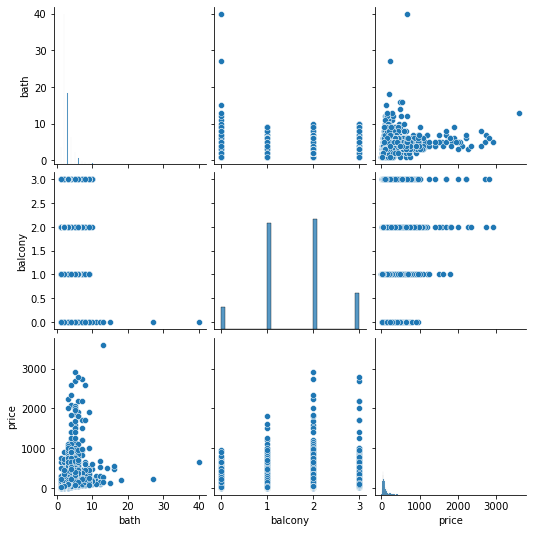

In [11]:
sns.pairplot(df)

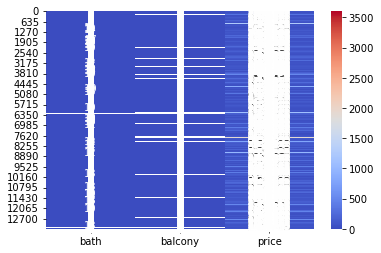

In [12]:
sns.heatmap(df[['bath','balcony','price']],cmap = 'coolwarm',annot =True)
plt.show()

In [13]:
g =df.groupby('area_type')

In [14]:
g.describe()

bath                                                \
                       count      mean       std  min  25%  50%  75%   max   
area_type                                                                    
Built-up  Area        2410.0  2.649378  1.250774  1.0  2.0  2.0  3.0  10.0   
Carpet  Area            87.0  2.505747  1.170108  1.0  2.0  2.0  3.0   9.0   
Plot  Area            2009.0  3.893479  2.022681  1.0  3.0  4.0  5.0  40.0   
Super built-up  Area  8741.0  2.430386  0.970320  1.0  2.0  2.0  3.0  27.0   

                     balcony            ...             price              \
                       count      mean  ...  75%  max   count        mean   
area_type                               ...                                 
Built-up  Area        2310.0  1.472727  ...  2.0  3.0  2418.0  104.285498   
Carpet  Area            82.0  1.402439  ...  2.0  3.0    87.0   89.502356   
Plot  Area            1837.0  1.392488  ...  2.0  3.0  2025.0  208.495486   
Super built-up  Area  8482.0  1.658100  ...  2.0  3.0  8790.0   92.971757   

                                                                          
                             std    min      25%    50%      75%     max  
area_type                                                                 
Built-up  Area        109.270222   9.00  47.0000   70.0  120.000  2050.0  
Carpet  Area           73.446012  13.00  47.7025   70.0  100.000   500.0  
Plot  Area            253.311895   8.44  85.0000  140.0  240.000  3600.0  
Super built-up  Area  113.971214   8.00  47.2500   65.0   98.195  2912.0  

[4 rows x 24 columns]

In [15]:
g.count()

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


In [16]:
df.drop(['society','availability','area_type','balcony'],axis = 1, inplace = True) # df = df[['location','size','total_sqft','bath','price']]

In [17]:
df.head(2)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00


In [18]:
df.shape

(13320, 5)

In [19]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [20]:
df.isna().mean()*100

location      0.007508
size          0.120120
total_sqft    0.000000
bath          0.548048
price         0.000000
dtype: float64

<AxesSubplot:>

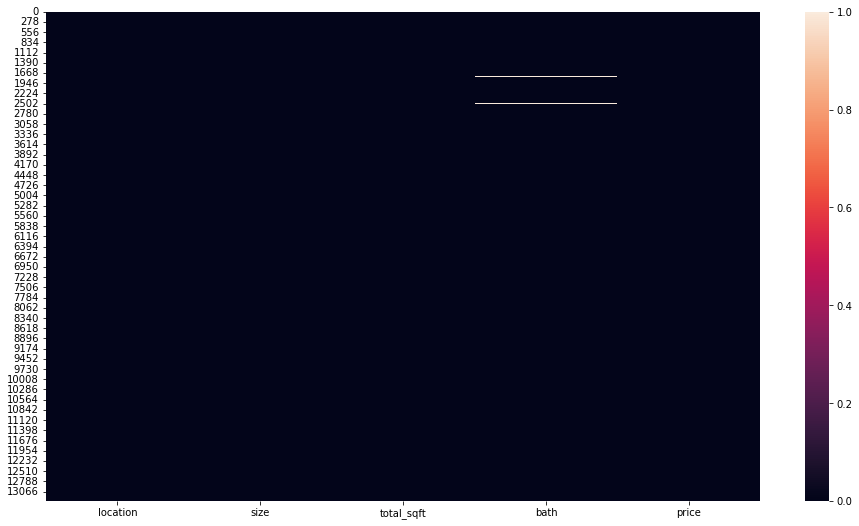

In [21]:
# Visualizing missing data using heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

#### Explore Column 'location'

In [22]:
df.location = df.location.fillna('Whitefield') # Filling missing value with mode

In [23]:
df.isna().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [24]:
df.location.value_counts()

Whitefield              541
Sarjapur  Road          399
Electronic City         302
Kanakpura Road          273
Thanisandra             234
                       ... 
Anantapuram               1
Sir M V Nagar             1
white field,kadugodi      1
Sadhguru Layout           1
Marathalli bridge         1
Name: location, Length: 1305, dtype: int64

In [25]:
df.location = df.location.str.strip()  # df.location.apply(lambda x: x.strip())
location_count = df.location.value_counts()

In [26]:
location_count

Whitefield                          542
Sarjapur  Road                      399
Electronic City                     304
Kanakpura Road                      273
Thanisandra                         237
                                   ... 
Manganahalli                          1
beml layout, basaveshwara nagar       1
Housing Board Layout Vijay Nagar      1
BDS Layout                            1
Haralur Road,                         1
Name: location, Length: 1294, dtype: int64

In [27]:
location_count_less_10 =location_count[location_count<=10]
location_count_less_10

BTM 1st Stage                       10
Dodsworth Layout                    10
Naganathapura                       10
Nagadevanahalli                     10
Sector 1 HSR Layout                 10
                                    ..
Manganahalli                         1
beml layout, basaveshwara nagar      1
Housing Board Layout Vijay Nagar     1
BDS Layout                           1
Haralur Road,                        1
Name: location, Length: 1053, dtype: int64

In [28]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)
df['location'].value_counts()

other                 2885
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Kodigehalli             11
HAL 2nd Stage           11
Pattandur Agrahara      11
Tindlu                  11
LB Shastri Nagar        11
Name: location, Length: 242, dtype: int64

#### Explore 'Size' Column

In [29]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
16 BHK           1
14 BHK           1
13 BHK           1
12 Bedroom       1
43 Bedroom       1
27 BHK           1
18 Bedroom       1
19 BHK           1
Name: size, dtype: int64

In [30]:
df.isna().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [31]:
df['size'] = df['size'].fillna('2 BHK')# to fill with mode value

In [32]:
df.head(2)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00


In [33]:
df['size'].str.split() # splitting string w.r.t space

0            [2, BHK]
1        [4, Bedroom]
2            [3, BHK]
3            [3, BHK]
4            [2, BHK]
             ...     
13315    [5, Bedroom]
13316        [4, BHK]
13317        [2, BHK]
13318        [4, BHK]
13319        [1, BHK]
Name: size, Length: 13320, dtype: object

In [34]:
df['size'].str.split().str.get(0) # And getting first value of size after splitting. But its output will be in a form of string

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: size, Length: 13320, dtype: object

In [35]:
df['bhk'] = df['size'].str.split().str.get(0).astype(int) # convering output in a form of integer and storing in 'bhk'
df.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4


In [36]:
# OR   df['bhk']=df['size'].apply(lambda x: int(x.split(' ')[0]))  

In [37]:
df[df.bhk >15] # Number of flats having value of bhk greater than 15

,location,size,total_sqft,bath,price,bhk
1718,other,27 BHK,8000,27.0,230.0,27
3379,other,19 BHK,2000,16.0,490.0,19
3609,other,16 BHK,10000,16.0,550.0,16
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
11559,other,18 Bedroom,1200,18.0,200.0,18


In [38]:
df[df.bhk <=1] # Number of flats having value of bhk less than than 1

,location,size,total_sqft,bath,price,bhk
20,Kengeri,1 BHK,600,1.0,15.00,1
24,Thanisandra,1 RK,510,1.0,25.25,1
42,other,1 BHK,600,1.0,38.00,1
43,Yelahanka,1 Bedroom,660,1.0,48.00,1
171,Attibele,1 BHK,450,1.0,11.00,1
...,...,...,...,...,...,...
13258,Whitefield,1 BHK,877,1.0,59.00,1
13273,Raja Rajeshwari Nagar,1 BHK,510,1.0,22.00,1
13291,other,1 Bedroom,812,1.0,26.00,1
13305,Hulimavu,1 BHK,500,1.0,220.00,1


In [39]:
df.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

#### Explore 'bath' column

In [40]:
df.isna().sum()

location       0
size           0
total_sqft     0
bath          73
price          0
bhk            0
dtype: int64

In [41]:
df['bath'] = df['bath'].fillna(df['bath'].median()) # filling missing value with median
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

#### Explore 'total_sqft' column

In [42]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [43]:
def convert_range(x):
    temp = x.split('-')
    if len(temp)==2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [44]:
df['total_sqft'] = df['total_sqft'].apply(convert_range)

In [45]:
df['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [46]:
df.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


#### Creation of Feature - price per square feet

In [47]:
df['price_per_sqft'] = df['price']*100000 /df['total_sqft']
df.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615


### Outlier Detection and Removal

In [48]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [49]:
# Function to create histogram, Q-Q plot and boxplot

import scipy.stats as stats         # for Q-Q plots
 
def diagnostic_plots(df, variable): # function takes a dataframe (df) and the variable of interest as arguments
 
    plt.figure(figsize=(16, 4))     # define figure size
    
    plt.subplot(1, 3, 1)  
    sns.distplot(df[variable], bins=30)        # histogram
    plt.title('Histogram')
 
    
    plt.subplot(1, 3, 2) 
    stats.probplot(df[variable], dist="norm", plot=plt)    # Q-Q plot
    plt.ylabel('Variable quantiles')
 
    
    plt.subplot(1, 3, 3)       
    sns.boxplot(y=df[variable])    # boxplot
    plt.title('Boxplot')
 
    plt.show()

******* bath *******


C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


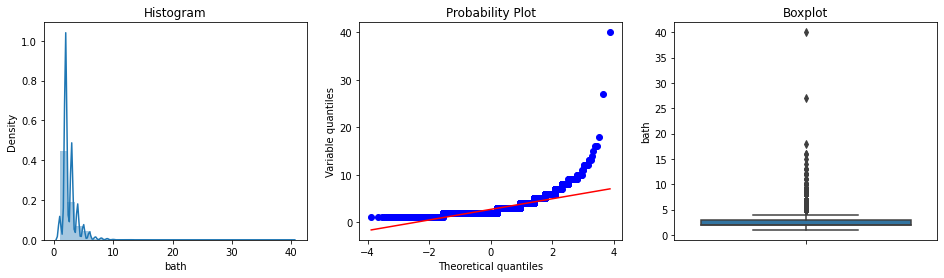

******* total_sqft *******


C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


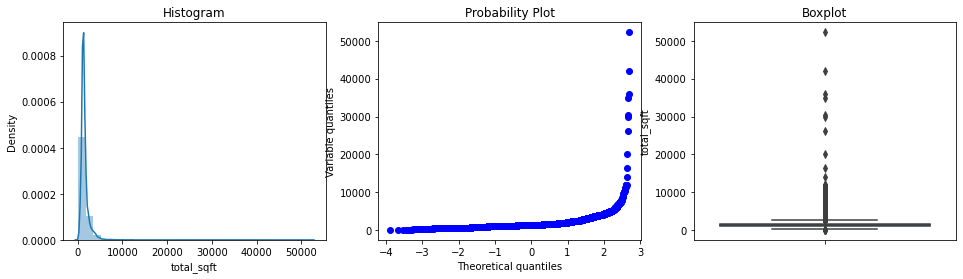

******* bhk *******


C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


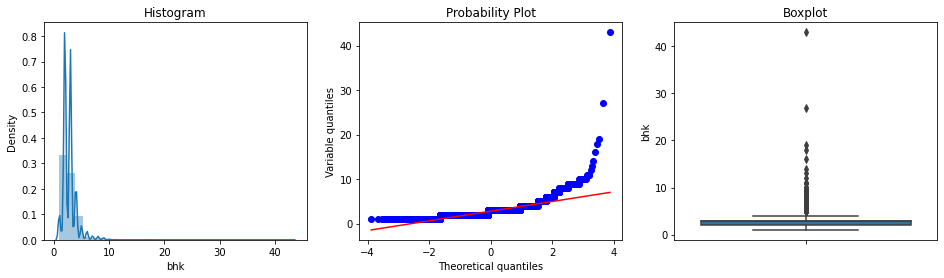

******* price *******


C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


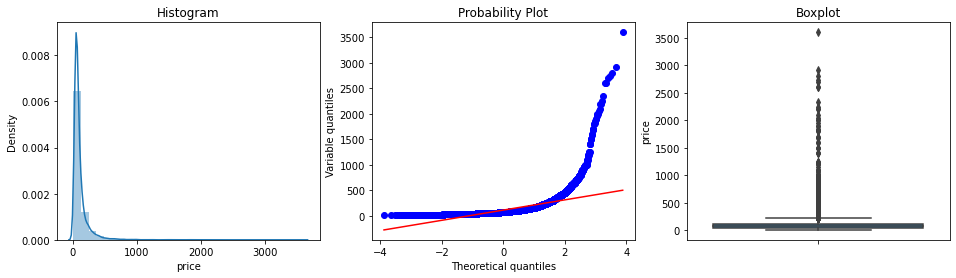

In [50]:
num_var = ["bath","total_sqft","bhk","price"]
for var in num_var:
  print("******* {} *******".format(var))
  diagnostic_plots(df, var)

<b> As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [51]:
(df['total_sqft']/df['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [52]:
df = df[(df['total_sqft']/df['bhk'])>=300]  # Only keep those having ratio greater than 300
df.shape

(12530, 7)

In [53]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [54]:
# Outlier Removal in price_per_sqft Using Standard Deviation and Mean

df.price_per_sqft.describe() # maximum value is outlier

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

<b> Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. To create generic model, we should remove outliers per location using mean and one standard deviation

In [55]:
# Creation of function to remove outliers per location. Because some locations wil have less price and some will have high price. Thus, we need to find mean and standard deviation per location and then filter out points which are beyond one standard deviation.

def outliers_sqft(df):
    df_output = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        
        gen_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_output = pd.concat([df_output, gen_df], ignore_index = True)
        return df_output

df = outliers_sqft(df)
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,7.000000,7.0,7.000000,7.000000,7.000000
mean,1998.571429,3.0,273.714286,3.285714,13186.920952
std,691.042174,1.0,126.757925,0.755929,1785.676416
min,1200.000000,2.0,130.000000,2.000000,10833.333333
25%,1432.500000,2.0,171.000000,3.000000,11942.823079
50%,1875.000000,3.0,235.000000,3.000000,12533.333333
75%,2600.000000,4.0,390.500000,4.000000,15017.862839
max,2850.000000,4.0,428.000000,4.000000,15020.408163


In [56]:
df.shape

(7, 7)

In [ ]:
def outliers_bhk (df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft <(stats['mean'])].index_values)
    return df.drop(exclude_indices, axis = 'index')
    

In [ ]:
df = outliers_bhk(df)

In [ ]:
df.describe()

In [ ]:
df.drop(['size','price_per_sqft'],1,inplace = True)
df.head(2)

In [ ]:
X = df.drop(columns = 'price')
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(sparse = False), ['location']),
                                      remainder = 'passthrough')

In [ ]:
scaler = StandardScaler()
lr = LinearRegression(normalize = True)

In [ ]:
pipe = make_pipeline(column_trans,scaler, lr)

In [ ]:
pipe.fit(X_train,y_train)

In [ ]:
y_pred_lr = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lr)

In [ ]:
# Ridge
ridge = Ridge()
pipe = make_pipeline(column_trans, scaler, ridge)

In [ ]:
pipe.fit(X_train, y_train)

In [ ]:
y_pred_ridge = pipe.predict(X_test)

In [ ]:
r2_score(y_test, y_pred_ridge)

In [ ]:
#import pickle 
#pickle.dumb(pipe, open('RidgeModel.pkl','wb'))